# Scaler Clustering Case Study

## Introduction

Scaler is an online tech-versity offering intensive computer science and data science courses. As a data scientist in the analytics vertical of Scaler, your task is to analyze a segment of learners and cluster them based on job profiles, companies, CTC, and other related features. The goal is to identify meaningful groups of learners with similar characteristics to provide actionable insights for business decisions.

This case study involves performing exploratory data analysis, manual clustering, and unsupervised learning techniques such as K-means,DBSCAN and hierarchical clustering to achieve the desired outcomes.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

## Loading the Dataset


In [ ]:
data = pd.read_csv("scaler_clustering.csv")
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
data.shape

(205843, 7)

In [ ]:
data.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
data.dtypes

,0
company_hash,object
email_hash,object
orgyear,float64
ctc,int64
job_position,object
ctc_updated_year,float64


In [ ]:
data.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [ ]:
data.isnull().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
data['email_hash'].nunique()

153443

In [ ]:
data['email_hash'].value_counts().head(5)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8


In [ ]:
data[data['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


## Cleaning Job Position Column

Special characters are removed from the `job_position` column using regular expressions. This ensures that the data is clean and standardized for further analysis.



In [ ]:
data['job_position'] = data['job_position'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x).strip() if isinstance(x, str) else x)

In [ ]:
data.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [ ]:
data.dtypes

,0
company_hash,object
email_hash,object
orgyear,float64
ctc,int64
job_position,object
ctc_updated_year,float64


## Histogram for CTC

A histogram is plotted to visualize the distribution of the `CTC` (Current Total Compensation). The kernel density estimate (KDE) is added to provide a smooth curve over the distribution, helping identify the general trend of CTC values in the dataset.



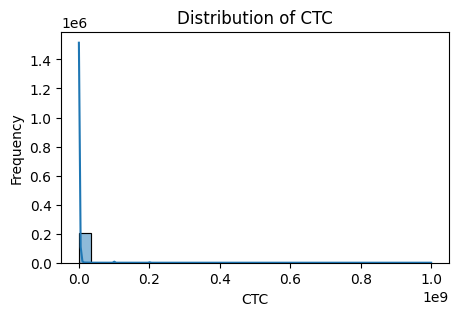

In [ ]:
# Histogram for CTC
plt.figure(figsize=(5,3))
sns.histplot(data['ctc'], bins=30, kde=True)
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

## Bar Plot for Top 10 Job Positions

The dataset is filtered to include only the top 10 most frequent job positions. A bar plot is generated to display the count of learners in each of these job positions. From the visualization, it can be observed that "Backend Engineer," "Full Stack," and other roles are the top 3 most common positions in the dataset.



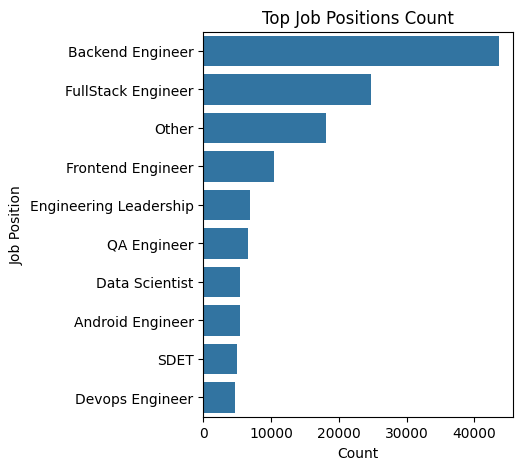

In [ ]:
job_count = data.groupby('job_position')['job_position'].count()
max_job_count = job_count.sort_values(ascending=False)
top10_max_job_count=max_job_count.head(10)

plt.figure(figsize=(4,5))
sns.barplot(x=top10_max_job_count.values, y=top10_max_job_count.index)
plt.title('Top Job Positions Count')
plt.xlabel('Count')
plt.ylabel('Job Position')
plt.show()

## Bar Plot for Top 10 Job Positions by Average CTC

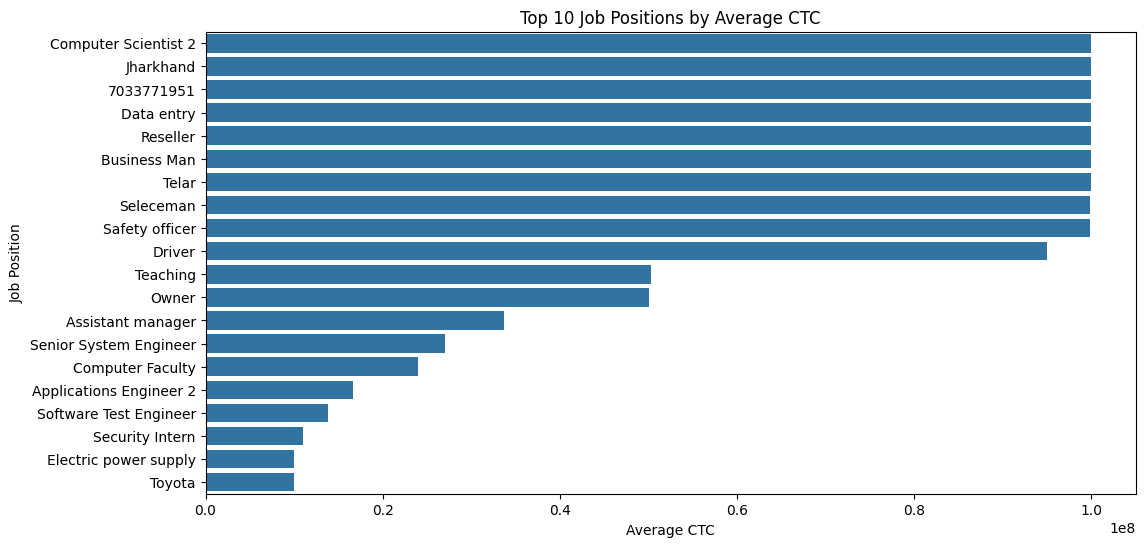

In [ ]:
average_salary = data.groupby('job_position')['ctc'].mean()
max_average_salary = average_salary.sort_values(ascending=False)
top10_max_average_salary=max_average_salary.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_max_average_salary.values, y=top10_max_average_salary.index)
plt.title('Top 10 Job Positions by Average CTC')
plt.xlabel('Average CTC')
plt.ylabel('Job Position')
plt.show()

## Encoding Categorical Variables

The categorical columns `email_hash`, `company_hash`, and `job_position` are encoded using `LabelEncoder` to transform them into numerical values.



In [ ]:
data['email_hash'] = LabelEncoder().fit_transform(data['email_hash'])
data['company_hash'] = LabelEncoder().fit_transform(data['company_hash'])
data['job_position'] = LabelEncoder().fit_transform(data['job_position'])

## Removing Duplicates

Duplicates are dropped from the dataset based on the combination of `email_hash`, `job_position`, and `company_hash` columns to ensure each learner-company-job position pairing is unique.



In [ ]:
data = data.drop_duplicates(subset=['email_hash', 'job_position', 'company_hash'], keep='first')

data.reset_index(drop=True, inplace=True)
data.shape

(200919, 6)

## Calculating Years of Experience

A new column `years_of_experience` is created by subtracting the `orgyear` (employment start year) from the current year. This feature will provide insights into how long each learner has been employed in their respective job roles.



In [ ]:
current_year = datetime.now().year
# Creating a new column for 'Years of Experience'
data['years_of_experience'] = current_year - data['orgyear']

<ipython-input-21-7455c85f0df1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['years_of_experience'] = current_year - data['orgyear']


## Standardizing the Dataset

The dataset is standardized using `StandardScaler`, which scales the features to have a mean of 0 and a standard deviation of 1.


In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(data)

In [ ]:
df= pd.DataFrame(df, columns=data.columns)

## Imputing Missing Values with KNN

Missing values in the dataset are imputed using the K-Nearest Neighbors (KNN) algorithm with 2 neighbors. This method leverages the similarity of data points to fill in missing values, enhancing the integrity of the dataset for subsequent analysis.



In [ ]:
imputer = KNNImputer(n_neighbors=2)
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Outlier Detection and Removal

Outliers in the dataset are identified and removed using the Local Outlier Factor (LOF) method with 20 neighbors.



In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

lof = LocalOutlierFactor(n_neighbors=20)

# Fiting  model and predict outliers
outlier_pred = lof.fit_predict(df)

mask_inliers = outlier_pred == 1

df = df[mask_inliers]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {df.shape}")

Original data shape: (200919, 7)
Cleaned data shape: (196316, 7)


## Dropping Duplicate Email Hashes




In [ ]:
df = df.drop_duplicates(subset='email_hash', keep='last')

In [ ]:
df.shape

(150452, 7)

## K-Means and Elbow Method for Optimal Number of Clusters

The Elbow Method is employed to determine the optimal number of clusters for K-Means clustering. A plot is generated showing the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The "elbow point" in the graph indicates the ideal number of clusters where adding more clusters yields diminishing returns in terms of variance explained.



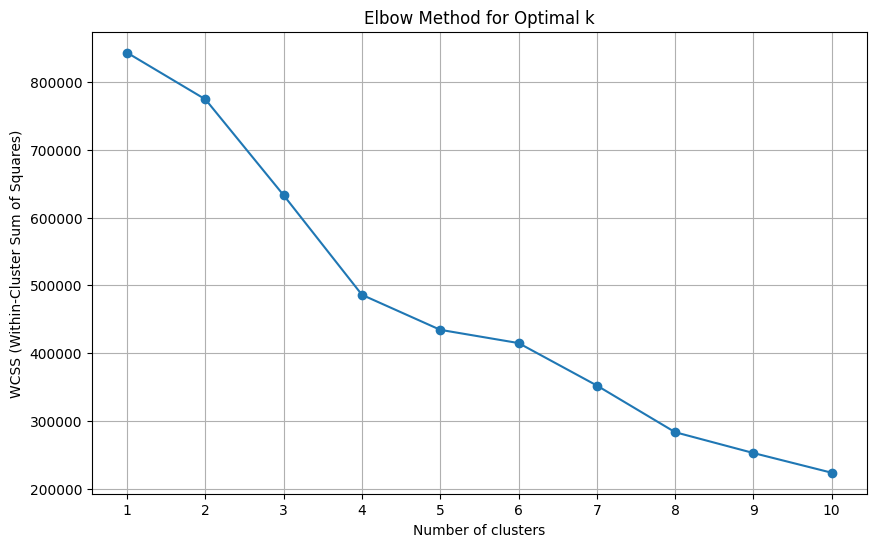

In [ ]:
wcss = []
max_clusters = 10  #  maximum number of clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.show()

## K-Means Clustering

The K-Means algorithm is applied with an optimal number of clusters set to 4.



In [ ]:
# optimal number of clusters
optimal_k = 4

# Fit K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,KMeans_Cluster
3,-0.670593,1.515794,0.033523,-0.133517,-0.986201,-0.468607,-0.033523,0
7,0.845679,-0.146582,0.064682,-0.158684,-0.986201,-0.468607,-0.064682,2
8,0.511852,1.328294,0.080262,-0.154489,1.498910,-0.468607,-0.080262,1
9,1.198802,0.688410,0.064682,-0.162039,1.498910,-0.468607,-0.064682,1
13,0.938962,-1.465088,0.017943,-0.155328,-0.809952,0.280796,-0.017943,2


## Hierarchical Clustering

Hierarchical clustering is performed on a randomly sampled subset of the dataset, consisting of 10,000 rows, due to computational constraints. The algorithm is configured to identify 3 clusters, and the cluster assignments are stored in a new column called `Hierarchical_Cluster`. The entire dataset was not utilized for clustering to avoid excessive computational costs.



In [ ]:
sample_data =df.sample(10000, random_state=42)  # Sample 500 rows randomly

In [ ]:
# Performing hierarchical clustering
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
sample_data['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(sample_data)

## Dendrogram for Hierarchical Clustering

A dendrogram is plotted to visualize the results of the hierarchical clustering performed on the sampled dataset. The plot is truncated to display only the top 5 levels, allowing for a clearer view of the cluster formation. The x-axis represents the index of the data points, while the y-axis indicates the Euclidean distance between merged clusters. This visualization aids in understanding the relationships between clusters at various levels of granularity.



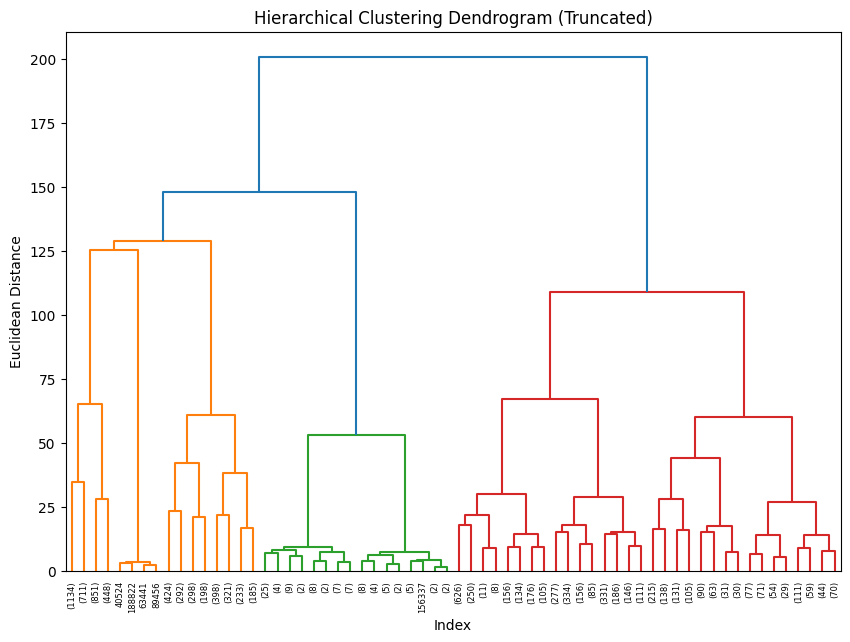

In [ ]:
linked = linkage(sample_data, method='ward')

# Ploting dendrogram with controlled depth
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation='top',
    labels=sample_data.index.tolist(),
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='level',
    p=5
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied to the dataset to identify clusters based on the density of data points. The parameters are set with `eps=0.5` and `min_samples=5`. The resulting cluster assignments are stored in a new column called `DBSCAN_Cluster`. The unique values of the `DBSCAN_Cluster` column indicate the different clusters formed, including any identified noise points.



In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

df['DBSCAN_Cluster'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 26,  9, 10, -1, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 54, 23, 24, 25, 29, 27, 53, 28, 51,
       32, 30, 45, 31, 50, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       47, 46, 48, 49, 52])

## t-SNE Visualization of DBSCAN Clusters

The t-SNE (t-distributed Stochastic Neighbor Embedding) technique is employed to reduce the dimensionality of the dataset to two components, allowing for a visual representation of the DBSCAN clustering results. In the scatter plot, each point represents a data instance colored according to its assigned DBSCAN cluster. The x-axis and y-axis represent the two t-SNE dimensions, providing insight into the distribution and separation of the clusters identified by DBSCAN.



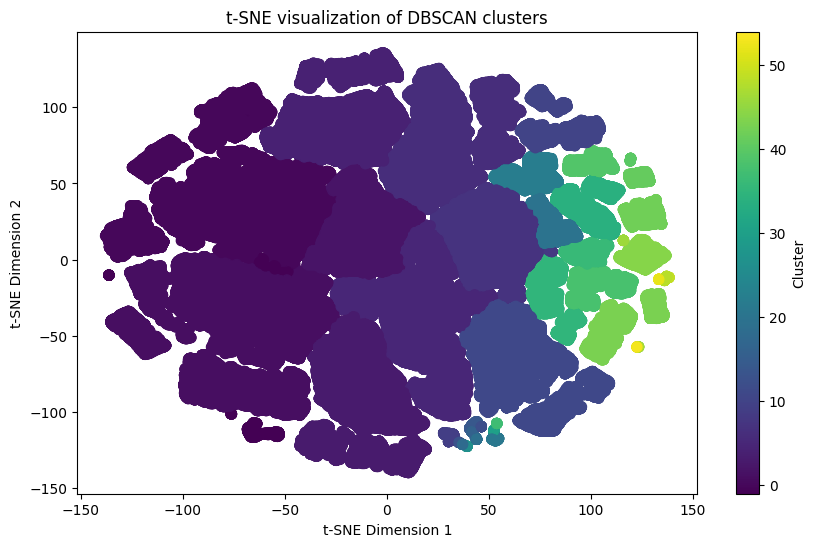

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)

# Plotting  t-SNE results with the DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of DBSCAN clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## PCA Visualization of DBSCAN Clusters

Principal Component Analysis (PCA) is utilized to reduce the dataset's dimensionality to two principal components. This visualization enables an understanding of the distribution and separation of the clusters identified by the DBSCAN algorithm. Each point in the scatter plot corresponds to a data instance, colored according to its assigned DBSCAN cluster. The x-axis and y-axis represent the first and second principal components, respectively, illustrating how well the clusters are formed in this reduced space.


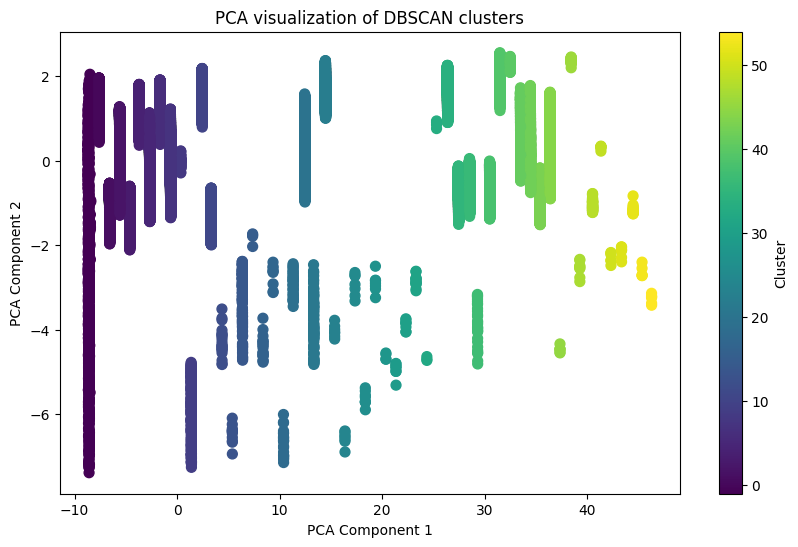

In [ ]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df)

# Plotting the PCA results with the DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('PCA visualization of DBSCAN clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Conclusion

In this analysis, we employed various clustering techniques, including K-Means, Hierarchical Clustering, and DBSCAN, to explore and categorize a dataset. The steps involved preprocessing, scaling, and handling outliers to ensure the quality of the data.

1. **Data Preparation:** We effectively cleaned the dataset, removing duplicates and handling missing values, ensuring that the subsequent clustering results are reliable.

2. **K-Means Clustering:** The Elbow Method was applied to determine the optimal number of clusters, leading to the selection of four clusters, which were assigned to the data points successfully.

3. **Hierarchical Clustering:** We used a sample of the dataset for hierarchical clustering due to computational constraints. The dendrogram provided a visual representation of the relationships between clusters, assisting in understanding the underlying data structure.

4. **DBSCAN Clustering:** This density-based clustering method revealed the data's intrinsic grouping, with some points identified as noise, indicating areas where data density is insufficient for cluster formation.

5. **Dimensionality Reduction:** t-SNE and PCA visualizations of the clustering results offered insights into how the clusters are distributed in lower-dimensional spaces, helping us to interpret the clustering outcomes.

Overall, the results indicate distinct job position categories and their respective characteristics, providing valuable insights into the dataset. Future work could involve further refinement of the clustering parameters and exploration of additional features to enhance the analysis.
